# Business Goals
So the goal of this project is to predict the house price based on the some descriptive variables.

In [1]:
import pandas as pd
from warnings import filterwarnings
import numpy as np
filterwarnings('ignore',category = DeprecationWarning)
filterwarnings('ignore',category = FutureWarning)
pd.set_option('display.max_columns',None)
train = pd.read_csv('./dataset/train.csv',na_values = ['NA','?'])

# EDA

In [2]:
train.shape
row_num = train.shape[0]
col_num = train.shape[1]

This dataset is used for a kaggle competition. Therefore, there is already a training dataset and a test dataset. There are total 81 columns and 1460 rows in training dataset. 81 columns variables include 80 predictors and a response variable(Sales Price) that we want to predict. 1460 rows means the number of samples we got in this datasets.


In [3]:
#drop id column 
train.drop(['Id'],axis = 1,inplace = True)
train.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,Y,SBrkr,1077,0,0,10

In [4]:
# We can check the number of categorical variables and number of numerical variables 
# train.info()
print('Number of Numerical variables:{}'.
      format(np.sum(train.dtypes != 'object')))
print('Number of Categorical variables:{}'.
      format(np.sum(train.dtypes == 'object')))

Number of Numerical variables:37
Number of Categorical variables:43


In [5]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Text(0.5, 0, 'SalePrice')

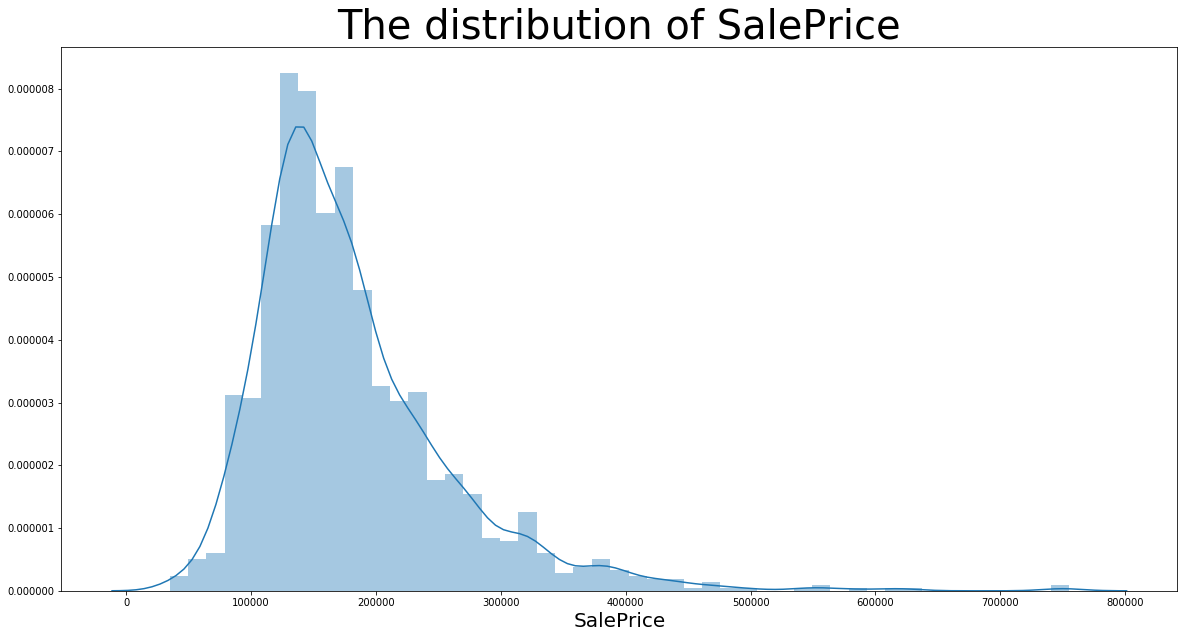

In [7]:
# Plot the overall distribution of sales price 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize = (20,10))
ax = sns.distplot(train.SalePrice)
ax.set_title('The distribution of SalePrice',fontsize = 40)
ax.set_xlabel('SalePrice',fontsize = 20)

As we can see from this plot, the distribution of SalePrice is not normally distributed and it's right skewed. That happens because this dataset has a higher boundary relative to the rest of data. One way we could do is to take log of those data. 

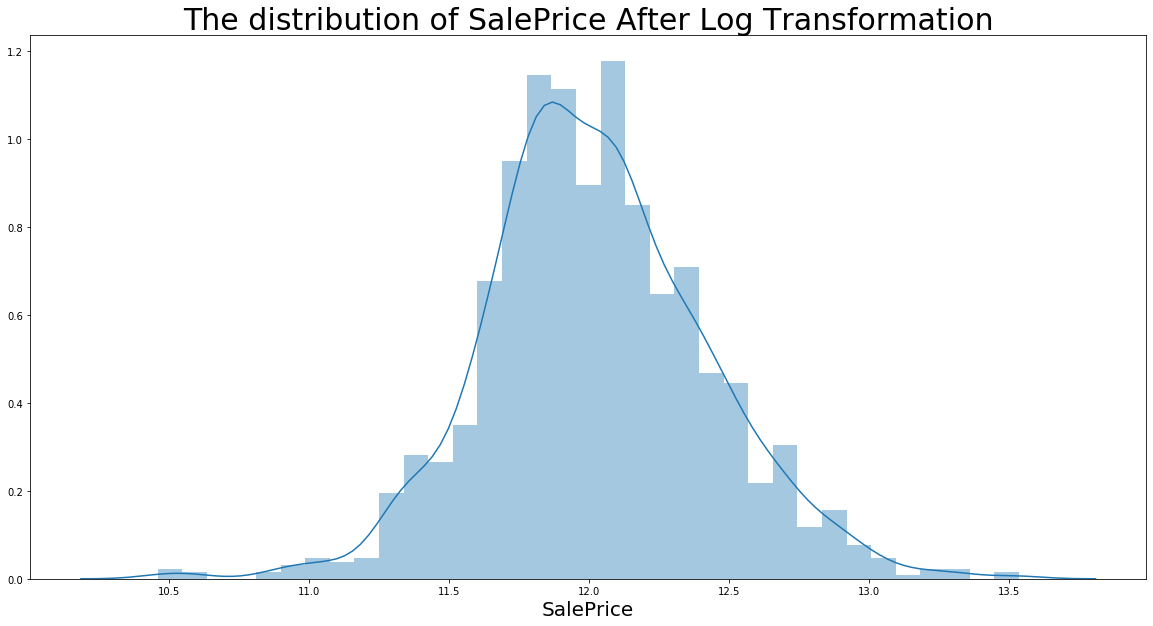

In [8]:
# Log Transformation and create a new column called SalePrice_Log
train['SalePrice_Log'] = np.log(train['SalePrice'])
plt.figure(figsize = (20,10))
ax = sns.distplot(train.SalePrice_Log)
ax.set_title('The distribution of SalePrice After Log Transformation',fontsize = 30)
ax.set_xlabel('SalePrice',fontsize = 20)
train.drop('SalePrice',axis = 1,inplace = True)

After log transformation, our SalePrice data points are close to be normally distributed. And I dropped the old SalePrice column.

Text(3.200000000000017, 0.5, 'SalePrice')

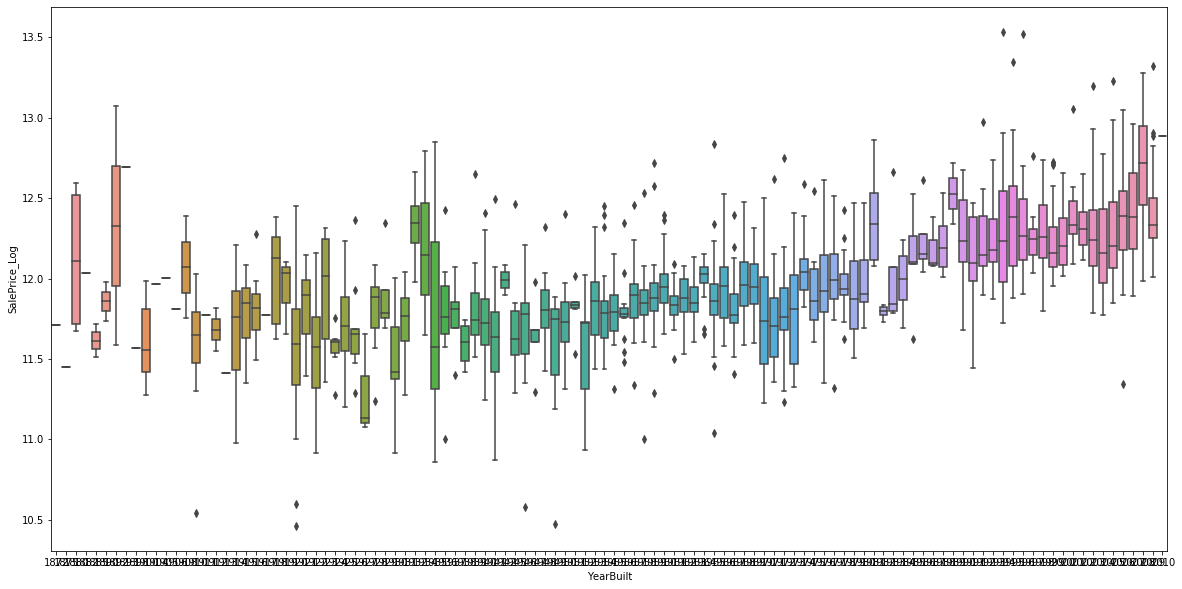

In [9]:
# Draw boxplots of SalePrice regarding to the YearBuilt
plt.figure(figsize = (20,10))
sns.boxplot(x = 'YearBuilt',y = 'SalePrice_Log',data = train)
ax.set_title('Boxplots of SalePrice in terms of the YearBuilt',fontsize = 30)
ax.set_xlabel('YearBuilt',fontsize = 20)
ax.set_ylabel('SalePrice',fontsize = 20)

We can see from this diagram, normally newer house, which corresponding to the larger YearBuilt value, the price is highe. But there is also a few cases where older houses have higher prices as well. Those old houses with higher price might have some advantages on other factors.

# Missing Value Handling

In [10]:
def missing_percent(data):
    missing_nums = data.isnull().sum()
    missing_percents = missing_nums/row_num
    missing_data = pd.concat([missing_nums,missing_percents],axis = 1
                             ,keys = ['Counts','Missing Percent'])
    miss_data = missing_data.sort_values('Missing Percent',ascending = False).head(20)
    return miss_data
miss_data = missing_percent(train)
miss_data

,Counts,Missing Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


19 variables in this dataset contain missing data and the top four on the above list have the very large percent of missing data. However, from a descrption of dataset, I found out some NaN valus do not mean missing value. For example, for column PoolQC, the NA means no Pool. For column MiscFeature, NA means no miscellaneous feature exists. For column Alley, NA means no alley access. For column Fence, NA means no fence. So I first am going to replace those type of NA values with "NO" word.

In [11]:
# list our variable names that has NA values which are not missing values
cols_NA = miss_data.drop(['LotFrontage',
                          'GarageYrBlt',
                          'MasVnrArea',
                          'Electrical'],axis = 0).index.values
# Fill those NA values with "NO" word
for col in cols_NA: 
    train[col].fillna('NO',inplace = True)

In [12]:
# check the current missing value again
missing_percent(train)

,Counts,Missing Percent
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrArea,8,0.005479
Electrical,1,0.000685
KitchenAbvGr,0,0.000000
GarageType,0,0.000000
FireplaceQu,0,0.000000
Fireplaces,0,0.000000
Functional,0,0.000000
TotRmsAbvGrd,0,0.000000


Now, we only have three variables that contain real missing value and I am going to impute according to each situation. I think LotFrontage(the linear feeet of street connnected to property) has  a close relationship to LotArea(Lot size in square feet) and Neighborhood(Physical Locations within Ames city limits since the LotFrontage of some houses will often be the same whithin the same neighborhood. Therefore, I will impute LotFrontage based on the other two variables. For electrical, I will fill in the missing values based on the most frequent values in this column. For MasVnrArea, I will impute it by just filling in the missing valeus with zero if their MasVnrType is None.

In [13]:
from sklearn.impute import SimpleImputer
imp_category = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp_median = SimpleImputer(missing_values = np.nan,strategy = 'median')
train['Electrical'] = imp_category.fit_transform(train[['Electrical']])
train['LotFrontage'] = imp_median.fit_transform(train[['LotFrontage']])
train['MasVnrArea'].fillna(0,inplace = True)
train['GarageYrBlt'] = imp_median.fit_transform(train[['GarageYrBlt']])

In [14]:
missing_percent(train)

,Counts,Missing Percent
MSSubClass,0,0.0
MSZoning,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
FireplaceQu,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0


In [15]:
# See the correlation between other variables to the target variable SalePrice
train.corr()['SalePrice_Log'].sort_values(ascending = False)

SalePrice_Log    1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
GarageYrBlt      0.495794
Fireplaces       0.489449
MasVnrArea       0.426775
BsmtFinSF1       0.372023
LotFrontage      0.335292
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice_Log, dtype: float64

From this correlation list, I would choose to keep the variables with higher correlation to the target variable SalePrice_Log.

Text(0.5, 1, 'Correlation HeatMap')

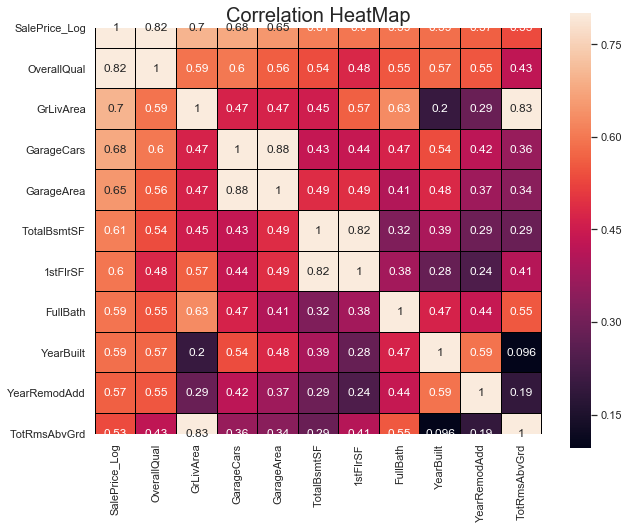

In [16]:
# Create a correlation heatmap for varaibles with higher correlation bigger than 0.5
corr = train[['SalePrice_Log','OverallQual','GrLivArea','GarageCars',
             'GarageArea','TotalBsmtSF','1stFlrSF','FullBath','YearBuilt',
             'YearRemodAdd','TotRmsAbvGrd']].corr()
plt.figure(figsize = (10,8))
sns.set(font_scale = 1)
sns.heatmap(corr,vmax = 0.8,linewidth = 0.05,square = True,annot = True,
    linecolor = 'black')
plt.title('Correlation HeatMap',fontsize = 20)

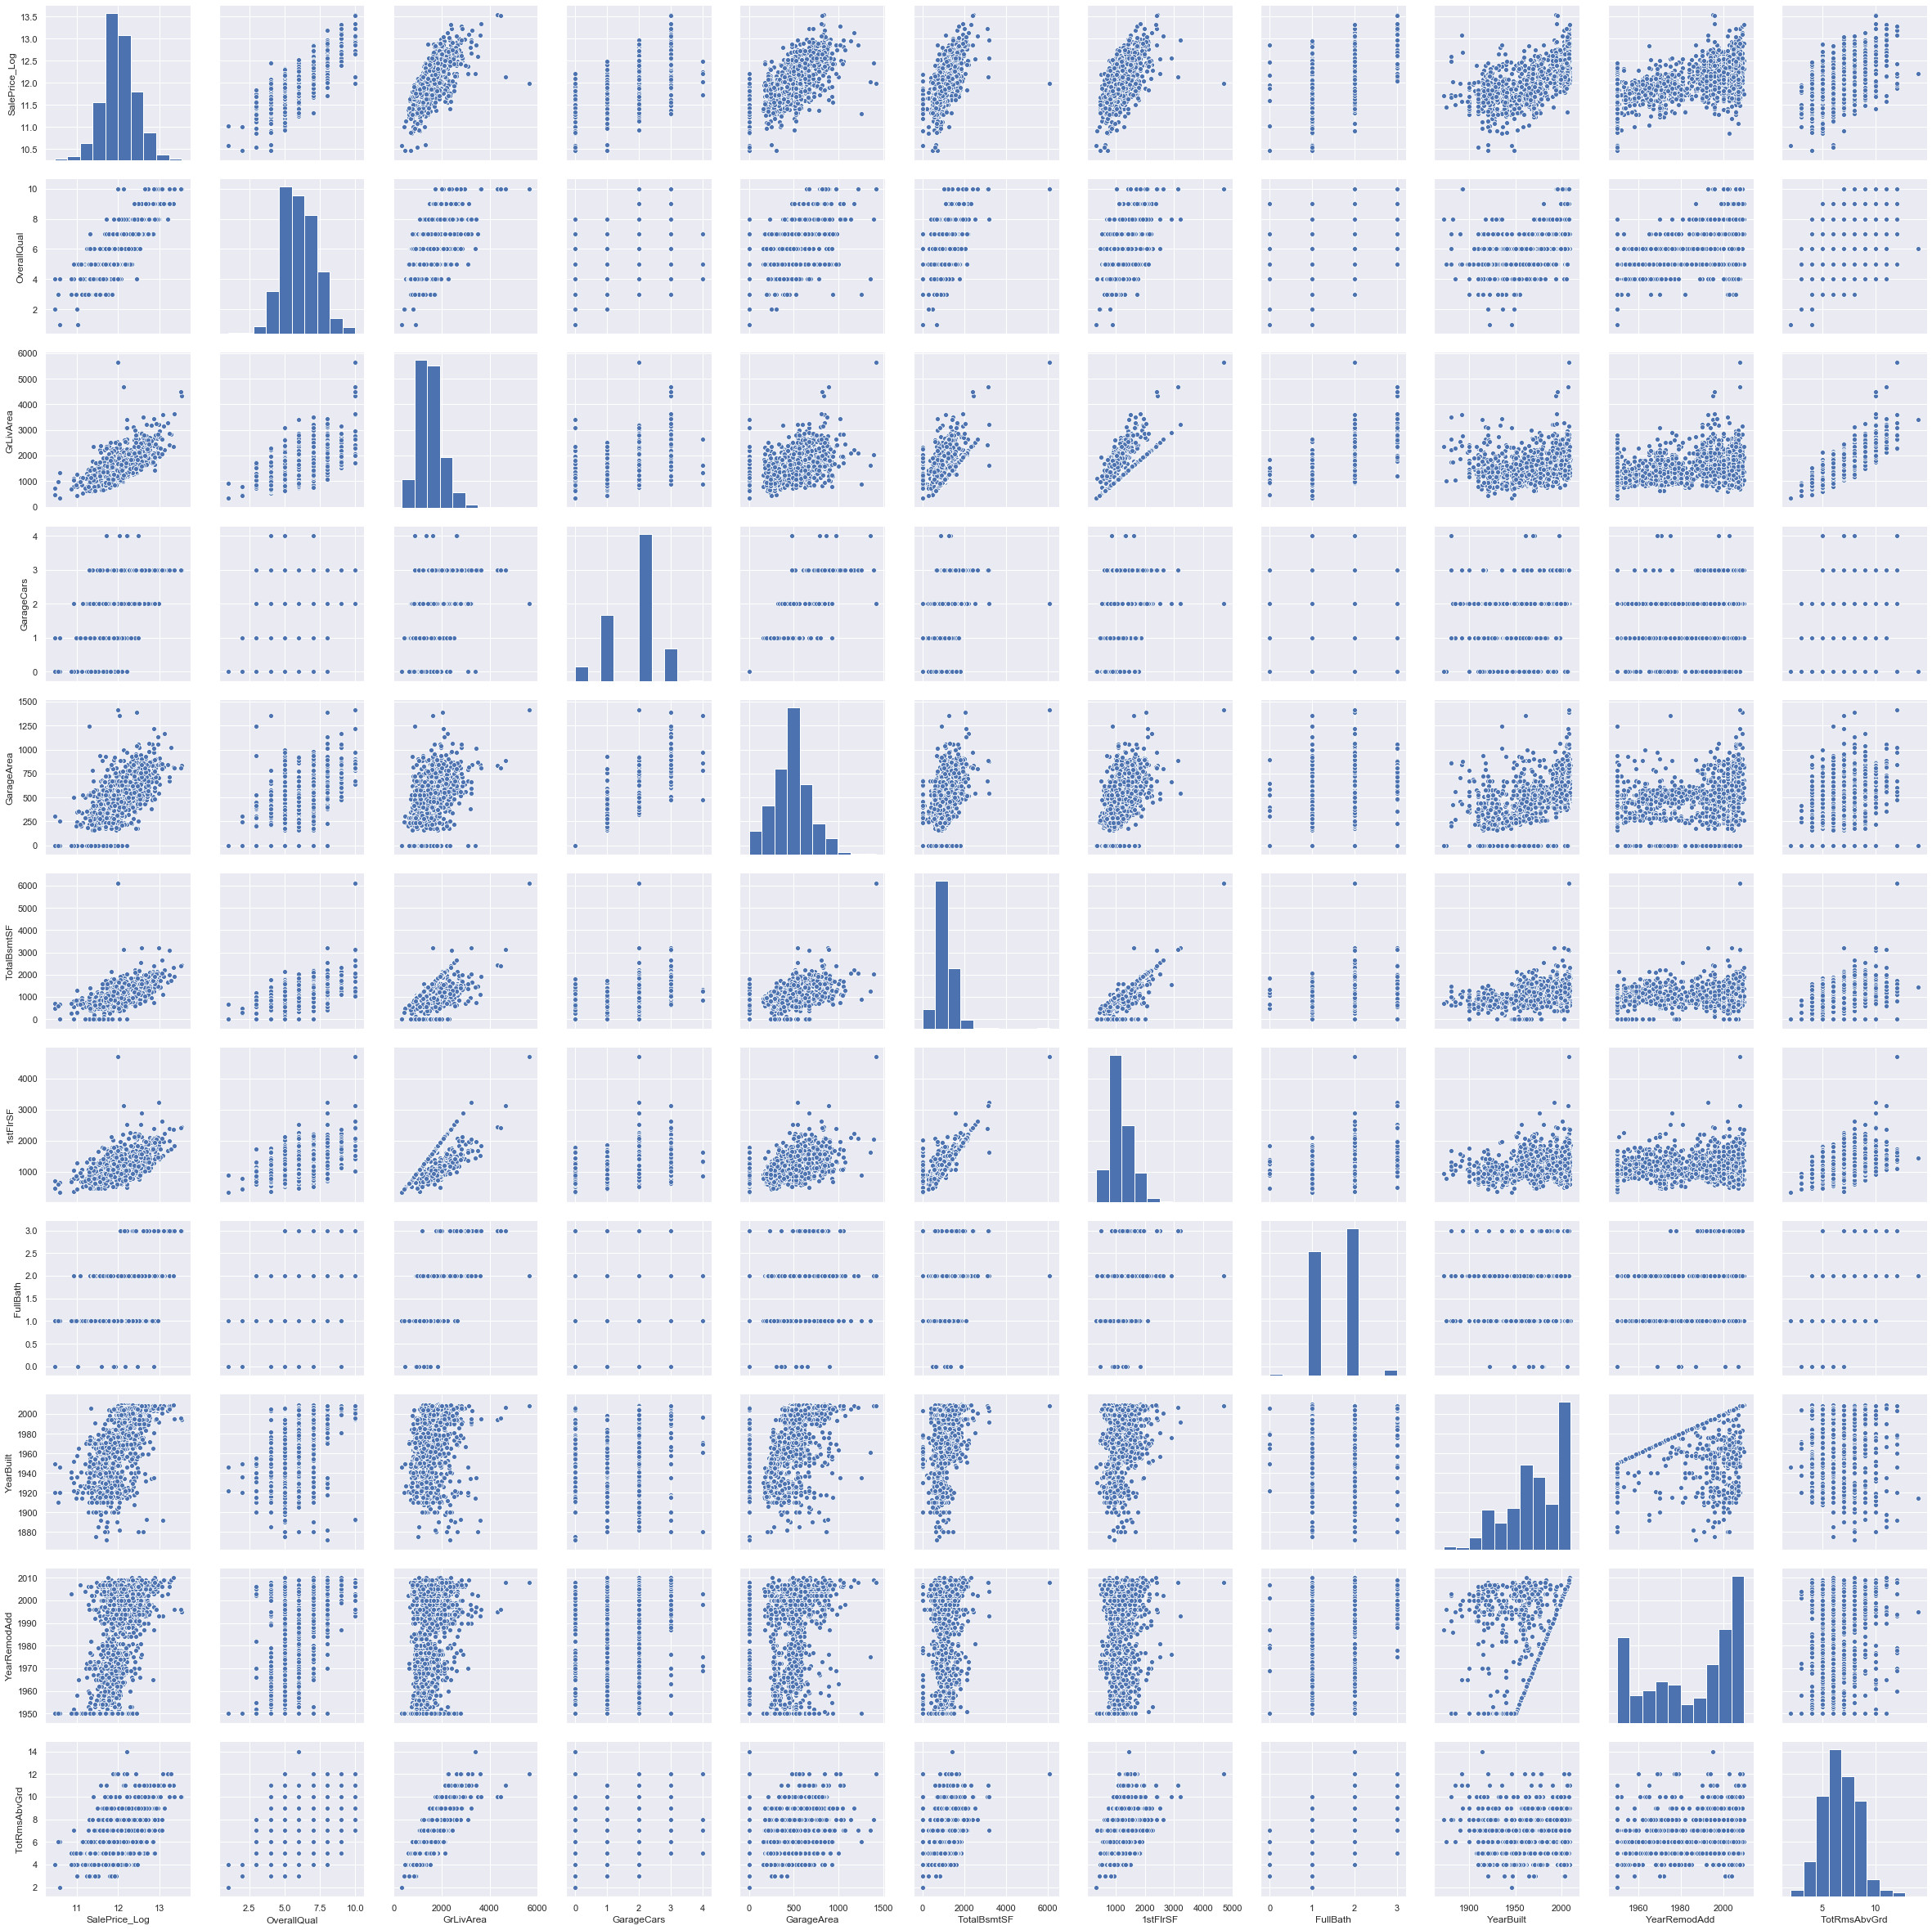

In [17]:
# Plot the pairplot
sns.set()
sns.pairplot(train[['SalePrice_Log','OverallQual','GrLivArea','GarageCars',
             'GarageArea','TotalBsmtSF','1stFlrSF','FullBath','YearBuilt',
             'YearRemodAdd','TotRmsAbvGrd']],height = 3)
plt.show()

In [22]:
train = train[['SalePrice_Log','OverallQual','GrLivArea','GarageCars',
             'GarageArea','TotalBsmtSF','1stFlrSF','FullBath','YearBuilt',
             'YearRemodAdd','TotRmsAbvGrd']]
train

,SalePrice_Log,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,YearBuilt,YearRemodAdd,TotRmsAbvGrd
0,12.247694,7,1710,2,548,856,856,2,2003,2003,8
1,12.109011,6,1262,2,460,1262,1262,2,1976,1976,6
2,12.317167,7,1786,2,608,920,920,2,2001,2002,6
3,11.849398,7,1717,3,642,756,961,1,1915,1970,7
4,12.429216,8,2198,3,836,1145,1145,2,2000,2000,9
...,...,...,...,...,...,...,...,...,...,...,...
1455,12.072541,6,1647,2,460,953,953,2,1999,2000,7
1456,12.254863,6,2073,2,500,1542,2073,2,1978,1988,7
1457,12.493130,7,2340,1,252,1152,1188,2,1941,2006,9
1458,11.864462,5,1078,1,240,1078,1078,1,1950,1996,5


In [36]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
X = train.drop(['SalePrice_Log'],axis = 1).values
y = train.loc[:,['SalePrice_Log']].values
X = StandardScaler().fit_transform(X)

In [46]:
# Just to show the sample data after standardization 
pd.DataFrame(data = X)

,0,1,2,3,4,5,6,7,8,9
0,0.651479,0.370333,0.311725,0.351000,-0.459303,-0.793434,0.789741,1.050994,0.878668,0.912210
1,-0.071836,-0.482512,0.311725,-0.060731,0.466465,0.257140,0.789741,0.156734,-0.429577,-0.318683
2,0.651479,0.515013,0.311725,0.631726,-0.313369,-0.627826,0.789741,0.984752,0.830215,-0.318683
3,0.651479,0.383659,1.650307,0.790804,-0.687324,-0.521734,-1.026041,-1.863632,-0.720298,0.296763
4,1.374795,1.299326,1.650307,1.698485,0.199680,-0.045611,0.789741,0.951632,0.733308,1.527656
...,...,...,...,...,...,...,...,...,...,...
1455,-0.071836,0.250402,0.311725,-0.060731,-0.238122,-0.542435,0.789741,0.918511,0.733308,0.296763
1456,-0.071836,1.061367,0.311725,0.126420,1.104925,2.355701,0.789741,0.222975,0.151865,0.296763
1457,0.651479,1.569647,-1.026858,-1.033914,0.215641,0.065656,0.789741,-1.002492,1.024029,1.527656
1458,-0.795151,-0.832788,-1.026858,-1.090059,0.046905,-0.218982,-1.026041,-0.704406,0.539493,-0.934130


In [50]:
# Split the dataset
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                    test_size = 0.20, random_state = 42)

# Model Evaluation

Text(0, 0.5, 'Predicted')

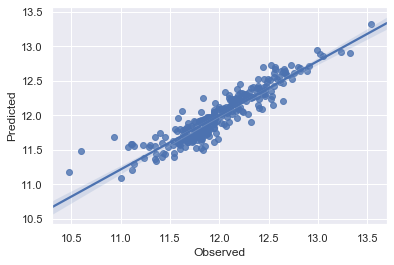

In [72]:
# Apply the linearRegression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
sns.regplot(y_test.flatten(), y_pred.flatten())
plt.xlabel("Observed")
plt.ylabel("Predicted")

In [75]:
# the coefficient of model 
reg.coef_

array([[ 0.13018754,  0.11180378,  0.06084982,  0.0104323 ,  0.02851343,
         0.0239741 , -0.01492632,  0.05812557,  0.04583494,  0.01140976]])

In [77]:
# Coefficient of determination of model (model-rsqare)
print (reg.score(X_train,y_train))
print (reg.score(X_test,y_test))

0.812114255615577
0.8440423645340108


In [82]:
import sklearn
mse = sklearn.metrics.mean_squared_error(y_test.ravel(), y_pred.ravel())
rsq = sklearn.metrics.r2_score(y_test.ravel(), Y_pred.ravel())
print("The MSE of this model is {}".format(mse))
print("The R2 score of this model is {}".format(rsq))

The MSE of this model is 0.02910380305193092
The R2 score of this model is 0.8440423645340108


# Pipeline

In [84]:
import pandas as pd
from warnings import filterwarnings
import numpy as np
filterwarnings('ignore',category = DeprecationWarning)
filterwarnings('ignore',category = FutureWarning)
pd.set_option('display.max_columns',None)
train = pd.read_csv('./dataset/train.csv',na_values = ['NA','?'])
test = pd.read_csv('./dataset/test.csv',na_values = ['NA','?'])

In [85]:
train = train[['SalePrice','OverallQual','GrLivArea','GarageCars',
             'GarageArea','TotalBsmtSF','1stFlrSF','FullBath','YearBuilt',
             'YearRemodAdd','TotRmsAbvGrd']]
X = train.drop(['SalePrice'],axis = 1).values
y = train['SalePrice'].values
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                    test_size = 0.20, random_state = 42)

In [86]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
lr_model = Pipeline(steps = [
                            ('scaler',StandardScaler()),
                            ('LR',LinearRegression())])
lr = lr_model.fit(X_train,y_train)

Text(0, 0.5, 'Predicted')

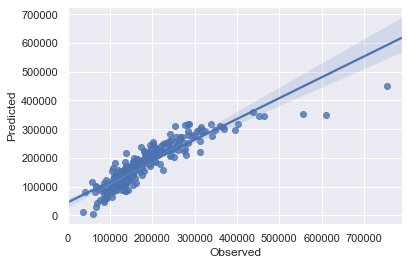

In [87]:
from sklearn import metrics
y_pred = lr_model.predict(X_test);
sns.regplot(y_test.flatten(), y_pred.flatten())
plt.xlabel("Observed")
plt.ylabel("Predicted")

In [88]:
print (lr_model.score(X_train,y_train))
print (lr_model.score(X_test,y_test))

0.7647556828674686
0.79684833042811
